# Cab pooling

## Introduction

Cab pooling is as easy as it sounds – it's  sharing a ride with other travelers or commuters who have similar start and end locations.Not only does carpooling save you money, but during a transportation or weather related emergency it may be the only way to get to work.

In [83]:
from IPython.display import HTML
from IPython.display import Image
Image(url="https://media.gettyimages.com/photos/-picture-id10176439?s=1024x1024")

## Objective

The main objective of car pooling is to:
1. Reduce peak hour congestion
2. Save money by sharing the cost of driving one car.

#### Importing the libraries

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from pylab import rcParams
from scipy.stats import spearmanr
from statsmodels.stats.outliers_influence import variance_inflation_factor
import itertools
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from pandas import *

#### Loading the dataset

In [3]:
df = pd.read_csv("Mergedd.csv")
df.head()

,Zone,PickupTime,service_zone,CabRequest,total_amount,tip_amount
0,Allerton/Pelham Gardens,2018-04-01 11,Boro Zone,1,41.8,0.0
1,Allerton/Pelham Gardens,2018-04-01 2,Boro Zone,1,23.8,0.0
2,Allerton/Pelham Gardens,2018-04-01 8,Boro Zone,1,44.8,0.0
3,Allerton/Pelham Gardens,2018-04-01 9,Boro Zone,2,69.6,0.0
4,Allerton/Pelham Gardens,2018-04-03 12,Boro Zone,1,11.3,0.0


#### Checking for the null values

In [4]:
df.isnull().sum()

Zone            0
PickupTime      0
service_zone    0
CabRequest      0
total_amount    0
tip_amount      0
dtype: int64

We can see that the data is clean and there are no null values present

#### Generating descriptive statistics of the dataset distribution

In [5]:
df.describe()

,CabRequest,total_amount,tip_amount
count,1.048564e+06,1.048564e+06,1.048564e+06
mean,8.954993e+01,1.461547e+03,1.670406e+02
std,1.618861e+02,3.402060e+03,3.718295e+02
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,4.310000e+01,1.000000e+00
50%,1.000000e+01,1.789800e+02,1.597000e+01
75%,1.010000e+02,1.531173e+03,1.696300e+02
max,2.677000e+03,9.071061e+05,5.991910e+03


#### Converting column Date from "date" format to "datetime" format
#### Creating a new column year using date column

In [7]:
df['Date']=df.PickupTime.str.split(' ').str[0].str.strip()
df['hour']=df.PickupTime.str.split(' ').str[1].str.strip()
df.head()

,Zone,PickupTime,service_zone,CabRequest,total_amount,tip_amount,Date,hour
0,Allerton/Pelham Gardens,2018-04-01 11,Boro Zone,1,41.8,0.0,2018-04-01,11
1,Allerton/Pelham Gardens,2018-04-01 2,Boro Zone,1,23.8,0.0,2018-04-01,2
2,Allerton/Pelham Gardens,2018-04-01 8,Boro Zone,1,44.8,0.0,2018-04-01,8
3,Allerton/Pelham Gardens,2018-04-01 9,Boro Zone,2,69.6,0.0,2018-04-01,9
4,Allerton/Pelham Gardens,2018-04-03 12,Boro Zone,1,11.3,0.0,2018-04-03,12


#### Converting column Date from "date" format to "datetime" format
#### Creating a new column year using date column

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

#### Assigning the year as 2018 in the dataset

In [9]:
df_Output=df[(df['Year']== 2018)]

#### Creating new columns such as week_day, month, month_name and month_year using the existing columns in the dataset

In [10]:
df_Output["week_day"]   = df_Output["Date"].dt.weekday_name
df_Output["month"] = pd.DatetimeIndex(df_Output["Date"]).month
df_Output["month_name"] = df_Output["month"].map({1:"JAN",2:"FEB",3:"MAR",
                                                4:"APR",5:"MAY",6:"JUN",
                                                7:"JUL",8:"AUG",9:"SEP",
                                                10:"OCT",11:"NOV",12:"DEC"
                                               })
df_Output["month_year"] = df_Output["Year"].astype(str) + " - " + df_Output["month_name"]

#### A map function is used above to map a particular month to its corresponding number

In [11]:
df_Output.head()

,Zone,PickupTime,service_zone,CabRequest,total_amount,tip_amount,Date,hour,Year,week_day,month,month_name,month_year
0,Allerton/Pelham Gardens,2018-04-01 11,Boro Zone,1,41.8,0.0,2018-04-01,11,2018,Sunday,4,APR,2018 - APR
1,Allerton/Pelham Gardens,2018-04-01 2,Boro Zone,1,23.8,0.0,2018-04-01,2,2018,Sunday,4,APR,2018 - APR
2,Allerton/Pelham Gardens,2018-04-01 8,Boro Zone,1,44.8,0.0,2018-04-01,8,2018,Sunday,4,APR,2018 - APR
3,Allerton/Pelham Gardens,2018-04-01 9,Boro Zone,2,69.6,0.0,2018-04-01,9,2018,Sunday,4,APR,2018 - APR
4,Allerton/Pelham Gardens,2018-04-03 12,Boro Zone,1,11.3,0.0,2018-04-03,12,2018,Tuesday,4,APR,2018 - APR


#### Checking the unique values present in "hour" column

In [12]:
df_Output.hour.unique()

array(['11', '2', '8', '9', '12', '13', '10', '3', '5', '17', '21', '7',
       '18', '20', '23', '0', '16', '15', '6', '19', '1', '14', '22', '4'],
      dtype=object)

#### Defining a function to create time intervals of a based on hours

In [13]:
def interval1(a):
    if a>=0 and a<=4:
        return 'late_night'
    elif a>4 and a<=8:
        return 'early_morning'
    elif a>8 and a<=12:
        return 'morning'
    elif a>12 and a<=16:
        return 'afternoon'
    elif a>16 and a<=20:
        return 'evening'
    else:
        return 'night'

#### Creating a new column "is_hour" based on time intervals

In [14]:
df_Output['is_hour'] = df_Output.hour.astype(int).apply(interval1)

In [15]:
df_Output.head()

,Zone,PickupTime,service_zone,CabRequest,total_amount,tip_amount,Date,hour,Year,week_day,month,month_name,month_year,is_hour
0,Allerton/Pelham Gardens,2018-04-01 11,Boro Zone,1,41.8,0.0,2018-04-01,11,2018,Sunday,4,APR,2018 - APR,morning
1,Allerton/Pelham Gardens,2018-04-01 2,Boro Zone,1,23.8,0.0,2018-04-01,2,2018,Sunday,4,APR,2018 - APR,late_night
2,Allerton/Pelham Gardens,2018-04-01 8,Boro Zone,1,44.8,0.0,2018-04-01,8,2018,Sunday,4,APR,2018 - APR,early_morning
3,Allerton/Pelham Gardens,2018-04-01 9,Boro Zone,2,69.6,0.0,2018-04-01,9,2018,Sunday,4,APR,2018 - APR,morning
4,Allerton/Pelham Gardens,2018-04-03 12,Boro Zone,1,11.3,0.0,2018-04-03,12,2018,Tuesday,4,APR,2018 - APR,morning


#### Converting the categorical values into numerical values using lable encoder

In [16]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
df_Output['is_hour']= label_encoder.fit_transform(df_Output['is_hour'])
df_Output['Zone']= label_encoder.fit_transform(df_Output['Zone'])
df_Output['total_amount']= label_encoder.fit_transform(df_Output['total_amount'])

In [17]:
df_Output.head()

,Zone,PickupTime,service_zone,CabRequest,total_amount,tip_amount,Date,hour,Year,week_day,month,month_name,month_year,is_hour
0,0,2018-04-01 11,Boro Zone,1,3432,0.0,2018-04-01,11,2018,Sunday,4,APR,2018 - APR,4
1,0,2018-04-01 2,Boro Zone,1,1633,0.0,2018-04-01,2,2018,Sunday,4,APR,2018 - APR,3
2,0,2018-04-01 8,Boro Zone,1,3732,0.0,2018-04-01,8,2018,Sunday,4,APR,2018 - APR,1
3,0,2018-04-01 9,Boro Zone,2,6212,0.0,2018-04-01,9,2018,Sunday,4,APR,2018 - APR,4
4,0,2018-04-03 12,Boro Zone,1,456,0.0,2018-04-03,12,2018,Tuesday,4,APR,2018 - APR,4


#### Checking for the unique values in column is hour

In [18]:
df_Output.is_hour.unique()

array([4, 3, 1, 0, 2, 5])

We can observe that the hours is converted into 6 time intervals

#### Creating an array of dates having public holidays in the year 2018

In [19]:
from array import array
datearr = ['2018-01-01','2018-01-15','2018-02-19','2018-04-16','2018-05-13','2018-05-28','2018-06-17','2018-04-04','2018-05-07','2018-20-08','2018-11-11','2018-11-12','2018-11-22','2018-11-23','2018-12-05','2018-12-24','2018-12-25']

#### Creating an array of dates having extreme weather condition in the year 2018

In [20]:
from array import array
datearr1 = ['2018-01-04','2018-01-12','2018-01-13','2018-01-17','2018-01-30','2018-02-10','2018-02-12','2018-02-11','2018-02-18','2018-02-21','2018-02-24','2018-02-25','2018-03-02','2018-03-05','2018-02-17','2018-03-18','2018-02-02','2018-05-15','2018-09-25','2018-11-15','2018-04-01']

#### Assigning the binary values to the public holidays corresponding to their respective dates

In [21]:
df_Output['is_public_holidays'] = ['yes' if x.strftime('%Y-%m-%d') in datearr else 'no' for x in df_Output['Date']]

#### Assigning the binary values to the extreme weather condition corresponding to their respective dates

In [22]:
df_Output['is_extreme_cliamte'] = ['yes' if y.strftime('%Y-%m-%d') in datearr1 else 'no' for y in df_Output['Date']]
#yes--1
#No--0

#### Checking the dataset with all the added columns and values

In [23]:
df_Output.head()

,Zone,PickupTime,service_zone,CabRequest,total_amount,tip_amount,Date,hour,Year,week_day,month,month_name,month_year,is_hour,is_public_holidays,is_extreme_cliamte
0,0,2018-04-01 11,Boro Zone,1,3432,0.0,2018-04-01,11,2018,Sunday,4,APR,2018 - APR,4,no,yes
1,0,2018-04-01 2,Boro Zone,1,1633,0.0,2018-04-01,2,2018,Sunday,4,APR,2018 - APR,3,no,yes
2,0,2018-04-01 8,Boro Zone,1,3732,0.0,2018-04-01,8,2018,Sunday,4,APR,2018 - APR,1,no,yes
3,0,2018-04-01 9,Boro Zone,2,6212,0.0,2018-04-01,9,2018,Sunday,4,APR,2018 - APR,4,no,yes
4,0,2018-04-03 12,Boro Zone,1,456,0.0,2018-04-03,12,2018,Tuesday,4,APR,2018 - APR,4,no,no


We can observe from the dataset that the binary values are assigned to the dates that are represented in an array for public holidays and extreme_weather_condition

#### Converting the categorical values into numerical values

In [24]:
df_Output['is_public_holidays']= label_encoder.fit_transform(df_Output['is_public_holidays']) 
df_Output['is_extreme_cliamte']= label_encoder.fit_transform(df_Output['is_extreme_cliamte']) 
df_Output['week_day']= label_encoder.fit_transform(df_Output['week_day']) 

#### Creating a new dataframe, considering only few columns from the older original dataset

In [52]:
df_pool = pd.DataFrame({"Zone":df_Output['Zone'],"total_amount":df_Output['total_amount'],"is_hour":df_Output['is_hour'],"week_day":df_Output['week_day'],"is_public_holidays":df_Output['is_public_holidays'],"is_extreme_cliamte":df_Output['is_extreme_cliamte'],"hour":df_Output['hour'],"CabRequest":df_Output['CabRequest']})
df_pool.head()

,Zone,total_amount,is_hour,week_day,is_public_holidays,is_extreme_cliamte,hour,CabRequest
0,0,3432,4,3,0,1,11,1
1,0,1633,3,3,0,1,2,1
2,0,3732,1,3,0,1,8,1
3,0,6212,4,3,0,1,9,2
4,0,456,4,5,0,0,12,1


#### Checking for the unique values present in a week

In [53]:
df_pool.week_day.unique() 

array([3, 5, 6, 4, 0, 1, 2])

3-SUNDAY
5-MONDAY
6-TUESDAY
4-WEDNESDAY
0-THURSDAY
1-FRIDAY
2-SATURDAY


#### Plotting the elbow graph to determine the number of clusters to be used

Text(0, 0.5, 'wcss: sum of dist. of sample to their closest cluster center')

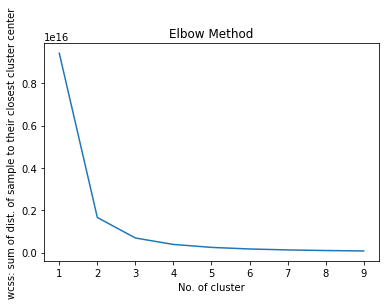

In [27]:
pick_pos = df_pool[['Zone','total_amount','is_hour','week_day','is_public_holidays','is_extreme_cliamte','CabRequest']]
wcss=[]
for n_clusters in range(1,10):
    kmeans=KMeans(n_clusters=n_clusters,init='k-means++',)
    kmeans.fit(pick_pos)
    wcss.append(kmeans.inertia_)
    clusters = kmeans.predict(pick_pos)
plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of cluster')
plt.ylabel('wcss: sum of dist. of sample to their closest cluster center' )

It is observed that number of cluster=2 is preferred

#### Checking the average number of cab request based on extreme wearher condition

In [28]:
df_pool[["is_extreme_cliamte", "CabRequest"]].groupby(['is_extreme_cliamte'], as_index=False).mean().sort_values(by='CabRequest', ascending=False)

,is_extreme_cliamte,CabRequest
1,1,95.571605
0,0,89.275586


We can observe that the cab request on days of extreme weather condition is greater than on the normal days

#### Checking the average number of cab request based on public holidays

In [29]:
df_pool[["is_public_holidays", "CabRequest"]].groupby(['is_public_holidays'], as_index=False).mean().sort_values(by='CabRequest', ascending=False)

,is_public_holidays,CabRequest
0,0,90.318380
1,1,75.751632


We can observe that the cab request on days of public holidays is lesser than on the normal days

#### Checking the average number of cab request based on week_day

In [30]:
df_pool[["week_day", "CabRequest"]].groupby(['week_day'], as_index=False).mean().sort_values(by='CabRequest', ascending=False)

,week_day,CabRequest
4,4,95.234645
0,0,93.485939
6,6,93.394452
5,5,92.093746
2,2,90.661573
1,1,84.421841
3,3,78.141644


We can observe that the cab request on wednesday is highest

3-SUNDAY
5-MONDAY
6-TUESDAY
4-WEDNESDAY
0-THURSDAY
1-FRIDAY
2-SATURDAY


#### Checking the average number of cab requests based on time intervals

In [31]:
df_pool[["is_hour", "CabRequest"]].groupby(['is_hour'], as_index=False).mean().sort_values(by='CabRequest', ascending=False)

,is_hour,CabRequest
2,2,129.369737
5,5,111.442528
0,0,106.790813
4,4,97.210371
1,1,59.063270
3,3,43.794270


We can observe that the time interval between 8am to 12pm and 8pm to 12 am has the highest cab requests

#### Defining a function to check the number of cab requests in a given time interval

In [32]:
def fun(a):
    if a>=15:
      return 1
    else:
      return 0

#### Applying the defined function to create a new column

In [33]:
df_pool['Pool_Request'] = df_pool.CabRequest.apply(fun)

In [34]:
df_pool.head()

,Zone,total_amount,is_hour,week_day,is_public_holidays,is_extreme_cliamte,CabRequest,Pool_Request
0,0,3432,4,3,0,1,1,0
1,0,1633,3,3,0,1,1,0
2,0,3732,1,3,0,1,1,0
3,0,6212,4,3,0,1,2,0
4,0,456,4,5,0,0,1,0


#### We can observe now that the values present in pool_request are 0 and 1
0 represents the number of cab request is less than 15 in a given time interval

In [35]:
df_pool.Pool_Request.unique()

array([0, 1])

We determined that car pooling request is 1 when cab request is greater than or equal to 15 is considered as a case of car pooling and when it is less than 15 it is not considered as shared cab and this data is defined on the basis of hourly bin,in which time interval we have maximum no of requests 

In [36]:
X = np.array(df_pool.drop(['Pool_Request'],axis=1))

In [37]:
y = np.array(df_pool['Pool_Request'])

### K-Means Clustering

k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

In [38]:
kmeans = KMeans(n_clusters=6) # You want cluster the total records : pool sharing or Not sharing
kmeans.fit(pick_pos)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

With the help of KMeans clustering to solve the problem of unsupervised learning , we have described 6 clusters in order to get better prediction on the basis of various parameters like zone,hourly bin,weekday,bizzarde climate and on public holidays

In [39]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.6161189601865578


With the help of dependent and independent variables we can describe that our model was able to cluster 60% correctly

In [40]:
kmeans = kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In order to enhance the performance of model we tweak some parameters of the model ,changed 
the no of clusters to 2 as we figured it out from elbow graph , changed maximum iterations to 600

In [41]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.7917929460458129


It is observed that there is approximately 20% increase in the score.Therefore, small ourl model is 80% correctly clustered

In [56]:
df_pool[["hour", "CabRequest","Zone"]].groupby(['hour',"Zone"], as_index=False).count().sort_values(by='CabRequest', ascending=False)

,hour,Zone,CabRequest
45,0,45,377
4135,23,45,377
4130,23,40,374
4137,23,47,374
3619,21,45,374
2605,18,45,372
4128,23,38,372
4132,23,42,372
3875,22,45,372
2348,17,45,372


In [60]:
def pool(CabRequest):
    if CabRequest>15:
        return df.Zone.values
    else:
        return 'nothing'

In [61]:
df_pool['ZONe_request'] = df_pool.Zone.apply(pool)
df_pool.head()

,Zone,total_amount,is_hour,week_day,is_public_holidays,is_extreme_cliamte,hour,CabRequest,ZONe_request
0,0,3432,4,3,0,1,11,1,nothing
1,0,1633,3,3,0,1,2,1,nothing
2,0,3732,1,3,0,1,8,1,nothing
3,0,6212,4,3,0,1,9,2,nothing
4,0,456,4,5,0,0,12,1,nothing


In [81]:
df_pool['ZONe_request'].values

array(['nothing', 'nothing', 'nothing', ...,
       array(['Allerton/Pelham Gardens', 'Allerton/Pelham Gardens',
       'Allerton/Pelham Gardens', ..., 'Cobble Hill', 'Cobble Hill',
       'Cobble Hill'], dtype=object),
       array(['Allerton/Pelham Gardens', 'Allerton/Pelham Gardens',
       'Allerton/Pelham Gardens', ..., 'Cobble Hill', 'Cobble Hill',
       'Cobble Hill'], dtype=object),
       array(['Allerton/Pelham Gardens', 'Allerton/Pelham Gardens',
       'Allerton/Pelham Gardens', ..., 'Cobble Hill', 'Cobble Hill',
       'Cobble Hill'], dtype=object)], dtype=object)

## Summary

Data analysis has been implemented to uncover interesting insights from the data. Data transformation was carried out for better analysis. Elbow graph is being plotted to determine the number of clusters to be used in the model. K-means clustering is performed for clustering. Clustering with k=2 and k=6 is performed. K=2 given a better prediction than k=6. Hence k=2 is chosen

# Conclusion

### Revenue forecasting

ARIMA model is used for time series forecasting. ARIMA with (p,d,q) = (2,2,1) is chosen as the AIC value for is better than other models.

Linear regression, decision tree regressor and random forest regressor are the algorithms used. Comparing these three models, random forest regressor is giving a better result as the rmse and msle value for them is least. Hence, random forest regressor is preferred

### Demand forecasting

Linear regression and decision tree regressor are the algorithms used. Decision tree regressor is overfitting the model. Linear regression has a better rmse and msle model when compared to decision tree regressor. Hence, linear regression is preferred

### Cab pooling

K-Means clustering with K=2 and K=6 was performed. The model with K=2 is giving better prediction than K=6. Hence, the model with k=2 is chosen

# Contribution

Source: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

Twelve months cab trip data of year 2018 was chosen as our dataset. The data cleaning was done and analysis on the variables was made. Each months data was merged with lookup table. Twelve month's dataset was merged to form a single dataset.

1. Demand forecasting: Mahesh Kandukuri
2. Revenue forecasting: Kelvin Julka
3. Cab pooling: Vinay Ramesh Kangokar

60% code from online resources
40% code by team

# Citation

1. Datacamp: https://www.datacamp.com/community/tutorials/k-means-clustering-python
2. github: https://www.kaggle.com/vinothkumarsubbiah/new-york-city-taxi-fare-prediction
3. kaggle:https://www.kaggle.com/monthepp/new-york-city-taxi-fare-prediction
4. Stackoverflow: https://stackoverflow.com/questions/15604647/k-means-clustering-algorithm

# License

Copyright 2019 Kelvin Julka, Mahesh kandukuri, Vinay Ramesh Kangokar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## Thank you!

#### By:
##### Kelvin julka
##### Mahesh Kandukuri
##### Vinay Ramesh Kangokar